My project plans to investigate FIFA, the highest governing body of soccer, and conduct a breakdown of its global audience. The data in use is from the 2010 World Cup.

In [1]:
library(tidyverse)
library("ggrepel")

df = read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/fifa/fifa_countries_audience.csv")
print(df)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Parsed with column specification:
cols(
  country = col_character(),
  confederation = col_character(),
  population_share = col_double(),
  tv_audience_share = col_double(),
  gdp_weighted_share = col_double()
)



# A tibble: 191 x 5
   country     confederation population_share tv_audience_sha… gdp_weighted_sha…
   <chr>       <chr>                    <dbl>            <dbl>             <dbl>
 1 United Sta… CONCACAF                   4.5              4.3              11.3
 2 Japan       AFC                        1.9              4.9               9.1
 3 China       AFC                       19.5             14.8               7.3
 4 Germany     UEFA                       1.2              2.9               6.3
 5 Brazil      CONMEBOL                   2.8              7.1               5.4
 6 United Kin… UEFA                       0.9              2.1               4.2
 7 Italy       UEFA                       0.9              2.1               4  
 8 France      UEFA                       0.9              2                 4  
 9 Russia      UEFA                       2.1              3.1               3.5
10 Spain       UEFA                       0.7              1.8               3.1
# … with

First, let's take a look at the countries and their available attributes. I will sort by decreasing GDP weighted share, which measures each country's audience share while factoring in nation's GDP.

In [2]:
gdp_df = df %>% arrange(desc(gdp_weighted_share))
print(as_tibble(gdp_df), n=20)

# A tibble: 191 x 5
   country     confederation population_share tv_audience_sha… gdp_weighted_sha…
   <chr>       <chr>                    <dbl>            <dbl>             <dbl>
 1 United Sta… CONCACAF                   4.5              4.3              11.3
 2 Japan       AFC                        1.9              4.9               9.1
 3 China       AFC                       19.5             14.8               7.3
 4 Germany     UEFA                       1.2              2.9               6.3
 5 Brazil      CONMEBOL                   2.8              7.1               5.4
 6 United Kin… UEFA                       0.9              2.1               4.2
 7 Italy       UEFA                       0.9              2.1               4  
 8 France      UEFA                       0.9              2                 4  
 9 Russia      UEFA                       2.1              3.1               3.5
10 Spain       UEFA                       0.7              1.8               3.1
11 South

Now, I want to graphically visualize the top countries in terms of GDP weighted share. To do this, I will filter for the countries that have greater than 1% of the global audience share (GDP weighted). The countries with 1% or less will make up the "Other" category, which I will filter out because it dominates the graphic.

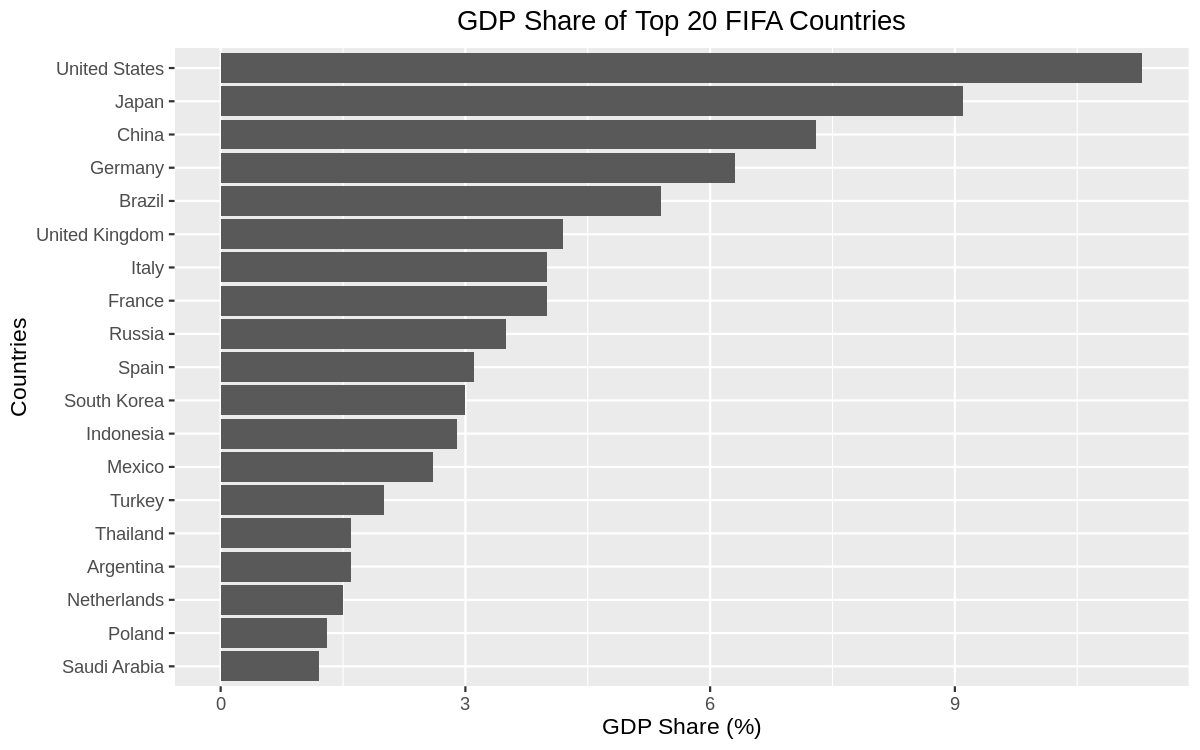

In [3]:
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 150)

df$filteredCountry = ifelse(df$gdp_weighted_share > 1.0, df$country, "Other")
df2 = df %>% filter(filteredCountry != "Other")

df3 = df2 %>%
    mutate(country_sorted = filteredCountry %>% fct_reorder(gdp_weighted_share, max))

p = ggplot(df3, aes(x = gdp_weighted_share, y = country_sorted)) +
    geom_col() +
    labs(y = "Countries", x = "GDP Share (%)", title = "GDP Share of Top 20 FIFA Countries") +
    theme(plot.title = element_text(hjust = 0.5))
p

We can see that the United States has the largest GDP share followed by Japan, China, Germany, etc.

At this point, I am curious to see the difference based on confederation, which each country has an association with.
I will add the GDP shares of the countries in each confederation and proceed to see the results graphically.

In [4]:
confed_df = df %>% group_by(confederation) %>%
            summarize(sum_gdp = sum(gdp_weighted_share)) %>% 
            arrange(desc(sum_gdp)) %>%
            mutate(confed_sorted = confederation %>%
                   fct_reorder(sum_gdp, max))
print(confed_df)

`summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 6 x 3
  confederation sum_gdp confed_sorted
  <chr>           <dbl> <fct>        
1 UEFA             39   UEFA         
2 AFC              31.6 AFC          
3 CONCACAF         15.8 CONCACAF     
4 CONMEBOL         10.3 CONMEBOL     
5 CAF               2.6 CAF          
6 OFC               0.1 OFC          


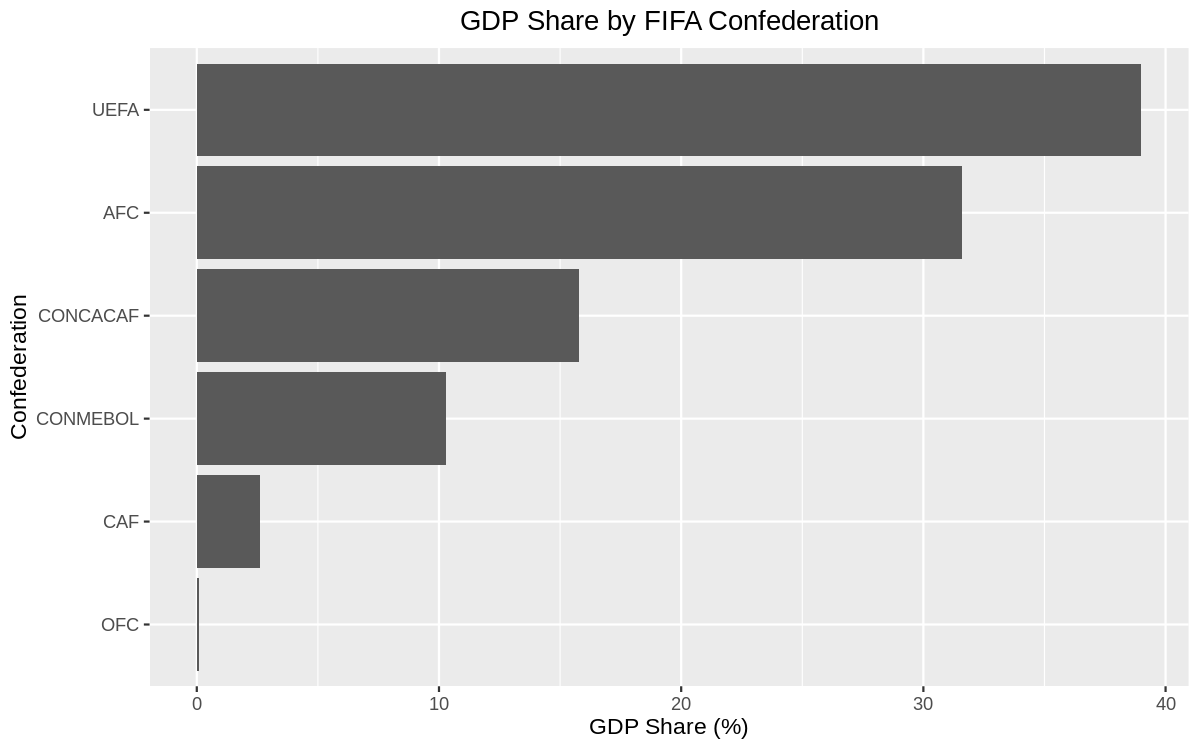

In [5]:
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 150)

p = ggplot(confed_df, aes(x = sum_gdp, y = confed_sorted)) +
    geom_col() +
    labs(y = "Confederation", x = "GDP Share (%)", title = "GDP Share by FIFA Confederation") +
    theme(plot.title = element_text(hjust = 0.5))
p

Although we previously saw that the United States did have the largest GDP share by country, its confederation (CONCACAF) ranks behind that of UEFA and AFC.

Finally, I want to investigate the correlation between GDP weighted share and TV audience share as well as the population share vs TV audience share.

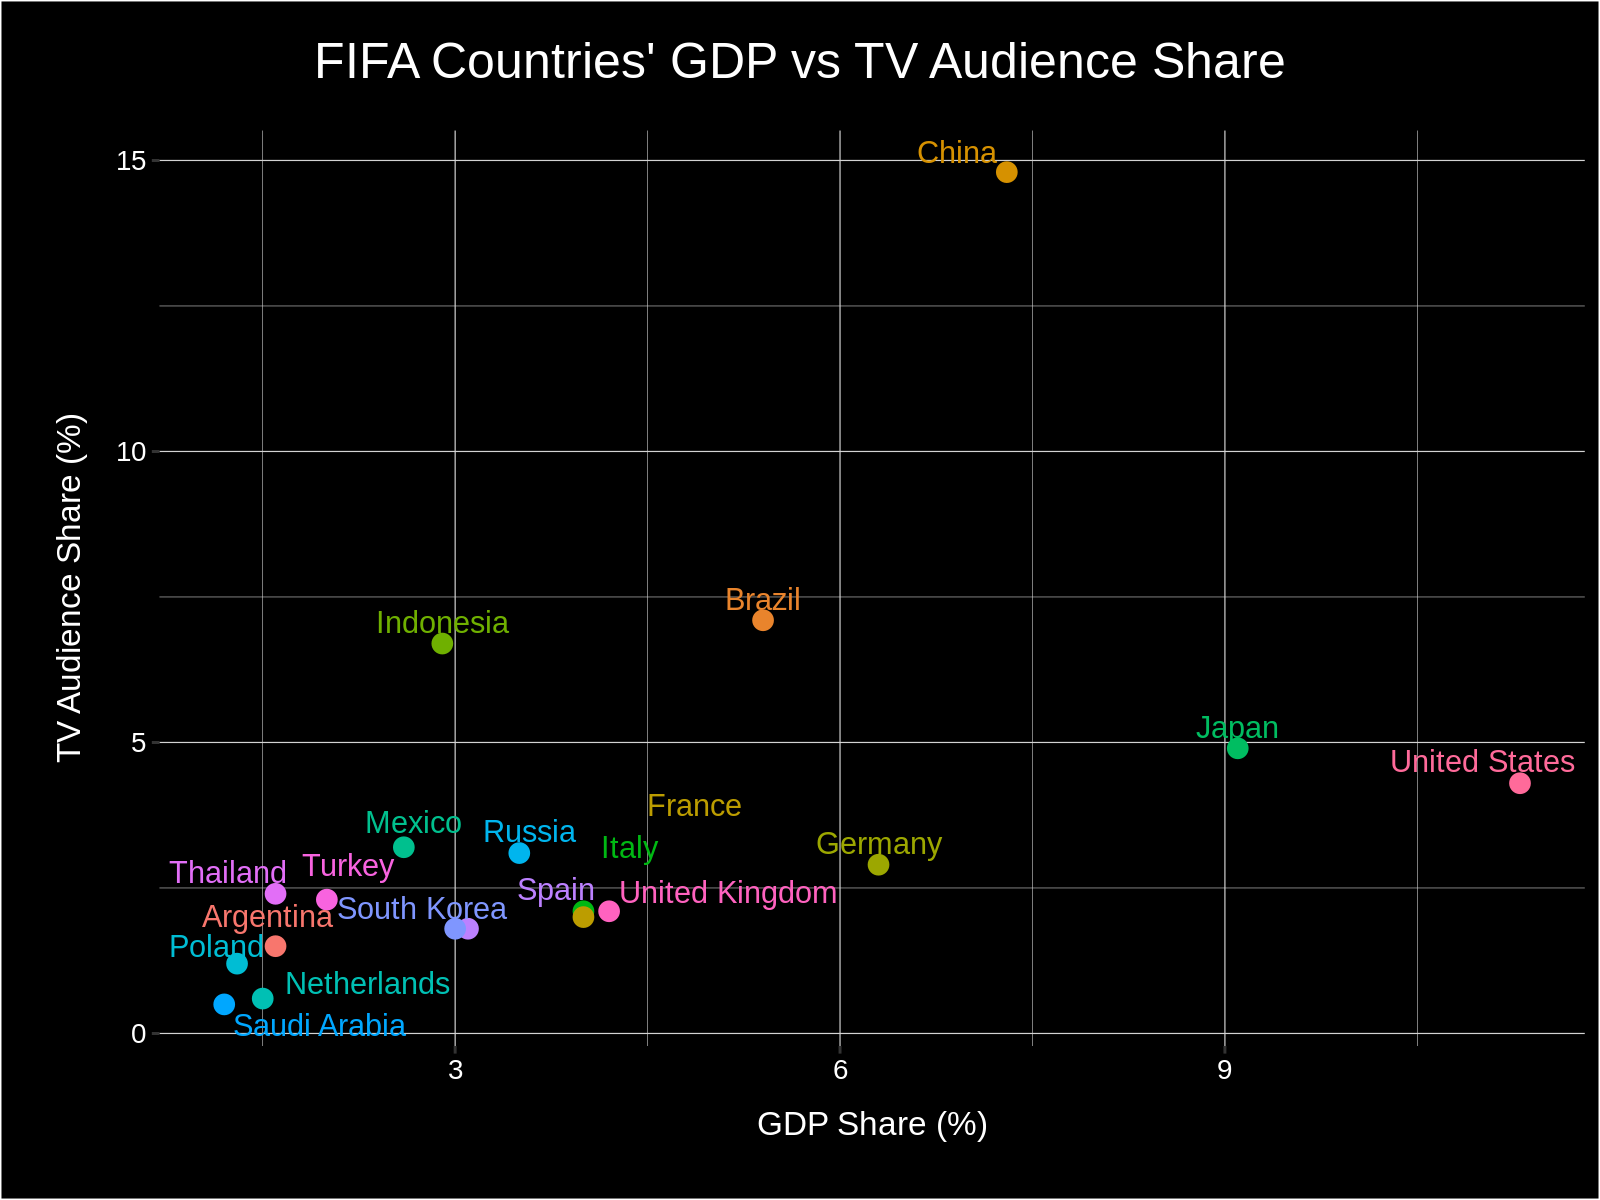

In [6]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 200)

df_top = df %>% filter(gdp_weighted_share > 1)

p = ggplot(df_top, aes(x=gdp_weighted_share, y=tv_audience_share, color=filteredCountry)) +
    geom_point(size=3) +
    labs(x = "GDP Share (%)", y = "TV Audience Share (%)", title = "FIFA Countries' GDP vs TV Audience Share") +

    theme(legend.position = "none",
          plot.title.position = "plot",
          plot.title = element_text(hjust = 0.5, margin=margin(10,0,15,0)),
          panel.background = element_rect(fill='black'),
          plot.background = element_rect(fill='black'),
          axis.title.x = element_text(color = "white", size=12, margin=margin(10,0,15,0)),
          axis.title.y = element_text(color = "white", size=12, margin=margin(0,10,0,15)),
          title = element_text(color="white", size=15),
          axis.text = element_text(color='white', size=10),
          plot.subtitle=element_text(size=10),
          panel.grid = element_line(size = .2, color="lightgrey"),
         )

p = p + geom_text_repel(
    segment.color = 'transparent',
    nudge_y = 0.25,
    data = df_top, 
    aes(label = country, color = country)
)

p

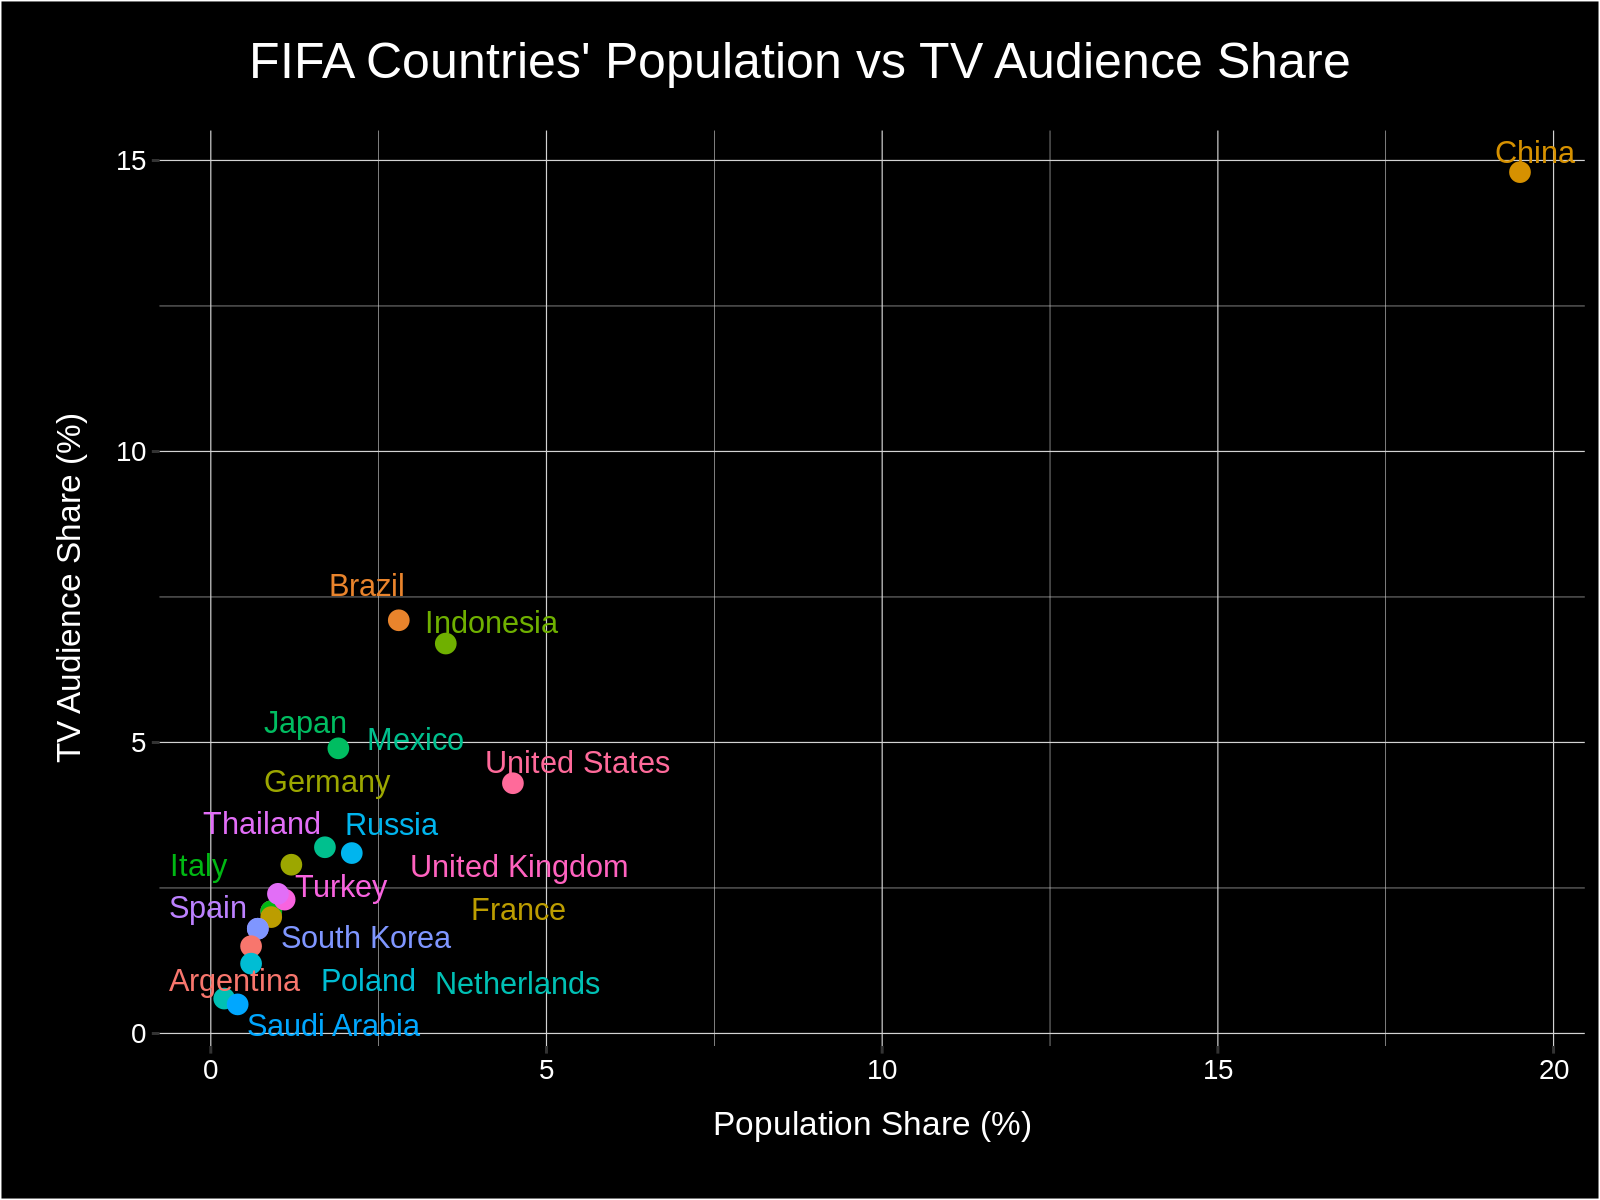

In [7]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 200)

df_top = df %>% filter(gdp_weighted_share > 1)

p = ggplot(df_top, aes(x=population_share, y=tv_audience_share, color=filteredCountry)) +
    geom_point(size=3) +
    labs(x = "Population Share (%)", y = "TV Audience Share (%)", title = "FIFA Countries' Population vs TV Audience Share") +

    theme(legend.position = "none",
          plot.title.position = "plot",
          plot.title = element_text(hjust = 0.5, margin=margin(10,0,15,0)),
          panel.background = element_rect(fill='black'),
          plot.background = element_rect(fill='black'),
          axis.title.x = element_text(color = "white", size=12, margin=margin(10,0,15,0)),
          axis.title.y = element_text(color = "white", size=12, margin=margin(0,10,0,15)),
          title = element_text(color="white", size=15),
          axis.text = element_text(color='white', size=10),
          plot.subtitle=element_text(size=10),
          panel.grid = element_line(size = .2, color="lightgrey"),
         )

p = p + geom_text_repel(
    segment.color = 'transparent',
    nudge_y = 0.25,
    data = df_top, 
    aes(label = country, color = country)
)

p

From the above graphs, we can see that population, TV, and GDP share have a general positive correlation with one another, as expected. Noteably, China posted the largest TV audience share for the 2010 FIFA World Cup. However, China's share of the world's population (19.5%) does not necessarily directly translate to the same make up in terms of its TV audience share (14.8%). On the other hand, a country like Japan more than doubles its population share when it comes to World Cup viewership and thus ranks 2nd in GDP share.

Factoring in each country's GDP, viewers in the United States and Japan are perceived as slightly more lucrative compared to that of China despite its superior TV audience. Even though the United States has a less than average World Cup audience (4.3%) relative to its entire population (4.5%), the wealth of the country is what makes up for this lost ground. Consequently, viewers in higher GDP nations are more valuable to sponsors than ones from a developing nation. When measuring by confederation, however, we see that UEFA is the most lucrative in terms of a GDP-weighted TV audience.